In [1]:
import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from Wrapper_FS import *
from hybrid_FS import *

np.random.seed(1)
random.sedd(1)

# Baseline with preselected genes for AE4

In [2]:
#Load preprocess data
AE4 = np.array(pd.read_csv ('../data/processed_data/AE4csv_process.csv'))
y = np.array(AE4[:,-1],dtype=int)
AE4 = AE4[:,0:-1]

In [5]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4,y,4)

In [6]:
print(AE4.shape, len(pred))
acc = model.score_
print(acc)

(1473, 1790) 1473
0.08719346049046321


In [7]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (0.1713520749665328, 0.9961485398942286, 0.08719346049046321, 0.9982171607637119, 0.9128065395095368, 0.8286479250334672)


# Filter methods

# Mutual information maximizer (MIM)

[  31   45   61   70   71   89  150  175  192  198  201  215  221  256
  289  299  364  373  382  406  426  443  454  474  480  503  506  516
  517  523  526  533  540  543  551  561  562  564  565  571  573  584
  585  592  593  594  596  604  606  612  615  625  639  640  673  706
  730  745  746  751  781  786  806  844  845  865  876  878  902  903
  928  933  935  996  999 1018 1061 1080 1084 1092 1104 1105 1117 1119
 1128 1162 1167 1175 1176 1178 1184 1200 1214 1228 1239 1240 1268 1271
 1295 1306 1315 1390 1396 1399 1404 1405 1408 1410 1426 1431 1475 1556
 1558 1564 1568 1569 1587 1600 1670 1674 1683 1761 1768 1769 1770 1771
 1774 1776 1780 1783] 0.4605263157894737


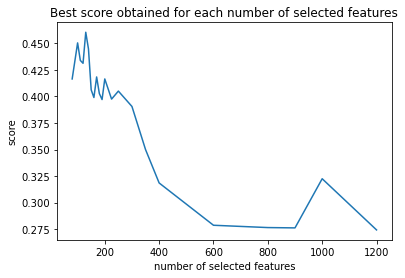

In [3]:
N = np.array([80,100,110,120,130,140,150,160,170,180,190,200,225,250,300,350,400,600,800,900,1000,1200])
best_subset, best_score = MIM(y, AE4, FamiliesClusters, compute_sensitivity,True,N, 3, plot=True)
print(best_subset, best_score)

In [4]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

130
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.4605263157894737, 0.992262328185594, 0.14242115971515767, 0.9984852473249375, 0.8575788402848423, 0.5394736842105263)


[  31   34   45   61   70   71   89  108  150  175  192  198  201  215
  221  256  289  299  364  373  382  406  426  443  454  474  480  503
  506  516  517  523  526  533  535  540  543  551  561  562  563  564
  565  571  573  584  585  592  593  594  596  604  606  612  615  625
  628  639  640  673  706  730  745  746  751  781  786  806  844  845
  865  876  878  902  903  928  933  935  996  999 1018 1049 1061 1080
 1084 1092 1104 1105 1117 1119 1128 1162 1167 1175 1176 1178 1184 1200
 1214 1228 1239 1240 1268 1271 1295 1306 1311 1315 1390 1396 1399 1404
 1405 1408 1410 1411 1426 1431 1475 1514 1556 1558 1564 1568 1569 1587
 1600 1670 1674 1683 1761 1768 1769 1770 1771 1774 1776 1780 1783] 0.14476386036960986


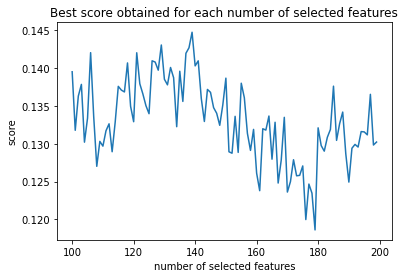

In [6]:
N = np.arange(100,200,1)
best_subset, best_score = MIM(y, AE4, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [7]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

139
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.483704974271012, 0.9920233649334482, 0.14476386036960986, 0.9985493626352442, 0.8552361396303901, 0.516295025728988)


# Fisher's score

[   8   28   30   31   39   42   55   60   61   66   71   82   85   87
   92   94   95   97  101  102  103  110  123  131  133  137  152  161
  168  173  178  179  182  188  192  194  200  203  209  212  216  220
  234  235  244  248  255  258  262  263  264  275  277  278  282  287
  294  303  304  317  324  326  327  328  329  338  339  340  341  349
  355  362  367  368  374  376  379  386  387  388  391  400  411  412
  413  414  416  421  424  425  429  430  436  438  442  444  445  446
  453  454  455  459  461  462  464  468  472  475  484  485  487  499
  506  508  528  530  536  537  556  563  566  568  570  571  572  580
  591  600  603  609  616  618  624  625  627  633  634  636  639  642
  644  651  653  659  661  672  679  687  689  691  695  708  714  716
  718  727  730  735  737  738  741  743  745  749  751  752  754  759
  761  763  770  772  774  781  785  787  793  794  797  803  807  809
  811  814  819  822  823  827  828  831  836  846  850  851  854  858
  860 

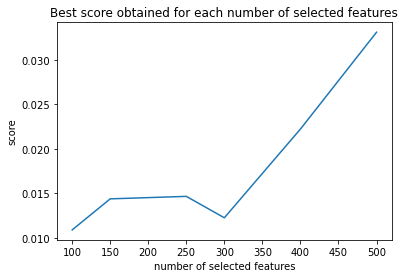

In [3]:
N = np.array([100,150,250,300,400,500])
best_subset, best_score = fishers_score(y, AE4, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [4]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

500
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.18873239436619718, 0.9883360040984828, 0.03308641975308642, 0.9982671167349592, 0.9669135802469135, 0.8112676056338028)


# Laplacian score

[   0    1    4    9   13   16   17   18   24   25   28   33   34   41
   48   51   57   58   59   60   62   63   64   65   67   72   73   74
   75   86   88   92   93   95   99  105  107  119  120  122  123  127
  128  131  134  139  140  141  145  153  154  159  163  164  167  179
  181  182  184  190  195  198  199  201  205  206  208  210  214  216
  219  222  225  228  234  235  238  240  244  248  252  254  261  263
  264  266  270  274  276  282  287  288  289  292  295  298  303  308
  310  314  318  321  323  324  325  331  335  339  340  346  348  349
  353  357  362  363  368  369  370  372  374  376  378  380  384  386
  388  389  391  392  395  398  399  401  405  406  407  414  417  420
  421  425  426  427  428  434  439  441  444  445  446  455  456  457
  459  463  467  470  472  477  478  479  480  483  493  496  497  504
  509  513  518  523  526  528  532  534  549  550  552  553  554  556
  557  559  560  561  565  566  567  570  572  578  580  581  583  590
  594 

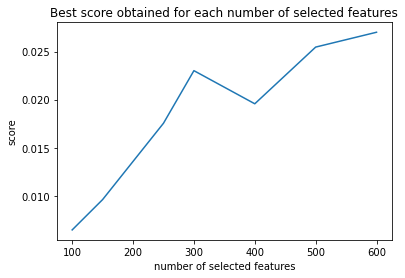

In [5]:
N = np.array([100,150,250,300,400,500,600])
best_subset, best_score = laplacian_score(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [6]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

600
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.1267605633802817, 0.9904365270579906, 0.027013506753376687, 0.9981566363568791, 0.9729864932466233, 0.8732394366197183)


# ReliefF algorithm

[   4    5    8   11   14   19   20   22   23   24   25   26   28   29
   30   31   32   33   37   39   40   47   52   55   59   60   64   72
   73   77   80   81   83   89   91  102  103  107  112  116  122  123
  124  128  129  131  134  140  142  144  145  146  153  163  165  167
  172  175  186  189  193  196  197  198  203  204  206  208  209  213
  214  215  218  222  223  227  232  233  236  238  243  244  253  255
  259  265  267  274  278  282  283  284  289  291  294  295  296  300
  306  307  308  309  311  312  313  315  316  322  323  324  326  329
  331  332  333  336  337  339  340  341  342  345  346  349  353  357
  358  361  362  366  370  373  374  377  383  385  397  398  400  404
  408  409  410  416  418  422  427  443  448  449  451  463  473  475
  476  478  480  481  484  485  487  489  494  495  498  499  500  501
  503  505  506  507  508  509  510  515  517  520  521  522  523  529
  530  531  537  540  545  546  547  551  552  554  562  564  565  567
  569 

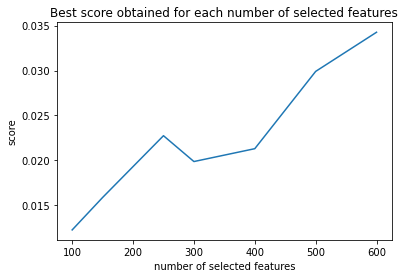

In [7]:
N = np.array([100,150,250,300,400,500,600])
best_subset, best_score = reliefF(y, AE4, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [8]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

600
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.17042606516290726, 0.9897457019674131, 0.03425692695214106, 0.9982142857142857, 0.9657430730478589, 0.8295739348370927)


# Fast Correlation Based Filter algorithm (FCBF)

[   7   13   16   18   21   26   29   30   34   38   41   43   45   48
   51   53   56   57   62   64   68   70   76   78   80   85   87   92
   93   94   95  102  107  124  125  126  129  137  138  141  147  148
  150  157  160  167  169  180  186  187  193  195  197  200  202  213
  214  218  225  226  233  238  242  243  248  252  254  256  257  258
  263  266  268  269  272  275  279  282  283  289  293  295  296  297
  305  306  310  313  322  323  325  329  333  337  339  344  346  351
  357  358  359  361  363  367  368  373  376  379  380  382  384  385
  409  410  414  415  416  420  427  431  440  443  444  445  455  460
  468  470  476  477  478  481  484  486  495  497  499  502  504  511
  514  517  518  519  520  523  524  533  536  542  548  552  561  572
  581  583  589  595  596  597  601  603  606  607  608  609  612  614
  615  618  620  627  633  638  639  640  643  644  645  647  648  651
  658  665  668  676  678  680  683  686  691  693  697  699  713  715
  717 

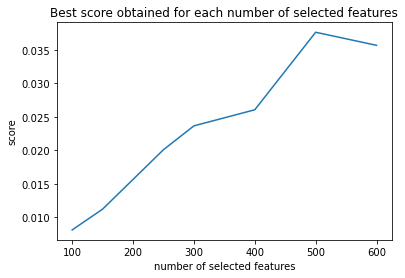

In [9]:
N = np.array([100,150,250,300,400,500,600])
best_subset, best_score = FCBF(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [10]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

500
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.20161290322580644, 0.9889513259560356, 0.03761283851554664, 0.9982738980844337, 0.9623871614844534, 0.7983870967741935)


# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


C:\Users\alexi\anaconda3\lib\site-packages\pyHSICLasso\api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 1473. Number of blocks 73.65 will be approximated to 73.
  warnings.warn(msg, RuntimeWarning)


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
[   0    3    4    6   13   20   21   23   24   29   31   34   36   51
   52   55   58   69   70   74   79   82   84   89   94   97   98   99
  100  102  121  125  130  131  132  134  137  138  139  142  146  151
  152  153  157  169  170  171  172  173  175  182  185  187  191  192
  208  212  213  215  216  221  222  225  227  239  243  245  248  2

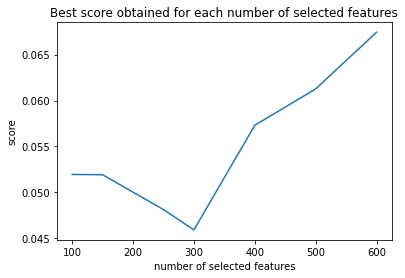

In [11]:
N = np.array([100,150,250,300,400,500,600])
best_subset, best_score = HsicLasso(y, AE4, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [12]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

600
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.24196597353497165, 0.99248602272872, 0.06743940990516333, 0.9982877297260367, 0.9325605900948367, 0.7580340264650284)


# Wrapper methods

# Stochastic optimization of features selection 

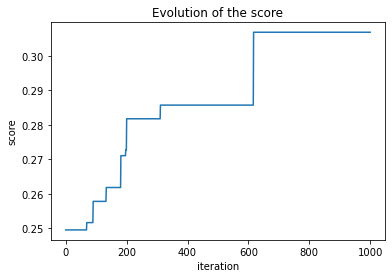

0.3068181818181818


In [13]:
best_subset, best_score  = hillclimbing(y, AE4, FamiliesClusters, compute_sensitivity,True, 1000, 0.1, True)
print(best_score)

In [14]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

944
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3068181818181818, 0.9907992025639084, 0.06894790602655772, 0.9984487607887416, 0.9310520939734422, 0.6931818181818182)


# Mutual information and stimmulated annealing

In [ ]:
best_subset, best_score = MI_stimulated_annealing(y,AE4, FamiliesClusters, compute_sensitivity,True, np.array([400]), 3, 800, 0.1, 1, True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate 
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Mutual information and genetic feature selection

In [ ]:
best_subset, best_score = MI_genetic_fs(y,AE4, FamiliesClusters, compute_sensitivity,True, np.array([850]), 3,  100, 0.5, 0.2, 40, 3, True)
print(best_subset, best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4[:, best_subset],y)
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Best method = 